# Optical Flow Magnitude test 

This notebook will try to follow optical flow 

initial code comes from : 
https://docs.opencv.org/3.3.1/d7/d8b/tutorial_py_lucas_kanade.html

In [2]:
%matplotlib inline
import cv2 
import os
import sys
import numpy as np 
import glob
import matplotlib.pyplot as plt

In [3]:
samplehash =  '10a278dc5ebd2b93e1572a136578f9dbe84d10157cc6cca178c339d9ca762c52' #'7fafc640d446cab1872e4376b5c2649f8c67e658b3fc89d2bced3b47c929e608'#

In [4]:
files = sorted(glob.glob( "../data/train/data/" + samplehash  + "/frame*.png" ))

In [5]:
images = [  cv2.imread(x,1)  for x in files  ]

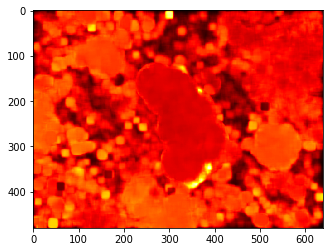

In [14]:
cap = cv2.VideoCapture("vtest.avi")
frame1 = images[0]
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
index  =0 
totale = np.zeros( (frame1.shape[0],frame1.shape[1]) ).astype(float)
while(1):
    index +=1
    if index == 100: break
    frame2 = images[index]
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    
    totale += mag 
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
#     cv2.imshow('frame2',bgr)
#     k = cv2.waitKey() #cv2.waitKey(30) & 0xff
#     if k == 27:
#         break
#     elif k == ord('s'):
#         cv2.imwrite('opticalfb.png',frame2)
#         cv2.imwrite('opticalhsv.png',bgr)
    prvs = next

totale = cv2.normalize(totale,None,0,255,cv2.NORM_MINMAX)
plt.figure()
plt.imshow( totale , cmap='hot' , interpolation='nearest')
cap.release()
cv2.destroyAllWindows()